## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice in the DataFrame.
count_df = len(data_df["Mouse ID"].unique())
count_df

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = data_df[data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate = dup_mice[["Mouse ID", "Timepoint"]]

duplicate

,Mouse ID,Timepoint
137,g989,0
360,g989,5
681,g989,10
869,g989,15
1111,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = data_df.drop_duplicates(["Mouse ID", "Timepoint"], keep="last")
new_df = pd.DataFrame(clean_mice)
new_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = len(clean_mice["Mouse ID"].unique())
cleaned_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Calculate mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = round(clean_mice.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'],2)
median = round(clean_mice.groupby('Drug Regimen').median()['Tumor Volume (mm3)'],2)
variance = round(clean_mice.groupby('Drug Regimen').var()['Tumor Volume (mm3)'],2)
standard_dev = round(clean_mice.groupby('Drug Regimen').std()['Tumor Volume (mm3)'],2)
sem = round(clean_mice.groupby('Drug Regimen').var()['Tumor Volume (mm3)'],2)

# Set data frame
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dev, "SEM": sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,24.95
Ceftamin,52.59,51.78,39.29,6.27,39.29
Infubinol,52.88,51.82,43.13,6.57,43.13
Ketapril,55.24,53.70,68.55,8.28,68.55
Naftisol,54.33,52.51,66.17,8.13,66.17
Placebo,54.03,52.29,61.17,7.82,61.17
Propriva,52.38,50.78,43.22,6.57,43.22
Ramicane,40.22,40.67,23.49,4.85,23.49
Stelasyn,54.23,52.43,59.45,7.71,59.45


## Bar Plots

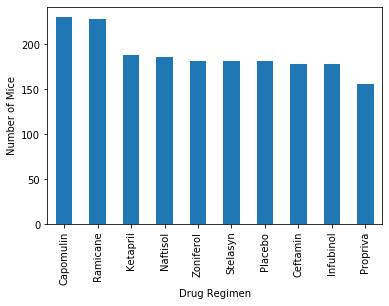

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.      
clean_mice["Drug Regimen"].value_counts()
drug_count = clean_mice["Drug Regimen"].value_counts()

# Set plot parameters
drug_count.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)

plt.show()

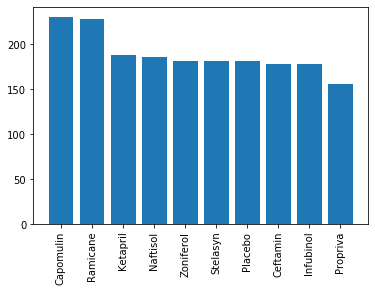

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(drug_count.index, drug_count.values)
plt.xticks(rotation=90)

plt.show()

## Pie Plots

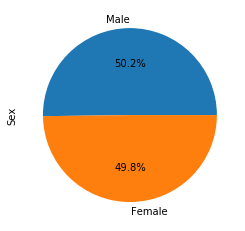

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = mouse_metadata["Sex"].value_counts()
gender_count.plot.pie(autopct='%1.1f%%')


plt.show()

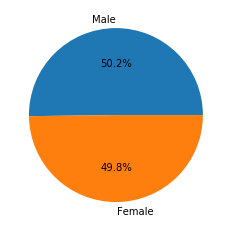

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender2_df= plt.pie(gender_count.values, labels=['Male','Female',], autopct='%1.1f%%'), #name='Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_df = clean_mice.loc[clean_mice["Drug Regimen"] == "Capomulin", :]
ram_df = clean_mice.loc[clean_mice['Drug Regimen'] == 'Ramicane', :]
inf_df = clean_mice.loc[clean_mice['Drug Regimen'] == 'Infubinol', :]
ceft_df = clean_mice.loc[clean_mice['Drug Regimen'] == 'Ceftamin', :]

# Keep the last time point for this drug

cap = cap_df.drop_duplicates(subset=["Mouse ID"], keep='last')
ram = ram_df.drop_duplicates(subset=["Mouse ID"], keep='last')
inf = inf_df.drop_duplicates(subset=["Mouse ID"], keep='last')
ceft = ceft_df.drop_duplicates(subset=["Mouse ID"], keep='last')

# Calculate upper and lower bounds
cap_quartiles = cap["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lower_bound = cap_lowerq - (1.5 * cap_iqr)
cap_upper_bound = cap_upperq + (1.5 * cap_iqr)
print(cap_upper_bound)
print(cap_lower_bound)

#Ramicane
ram_quartiles = ram["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lower_bound = ram_lowerq - (1.5 * ram_iqr)
ram_upper_bound = ram_upperq + (1.5 * ram_iqr)
print(ram_upper_bound)
print(ram_lower_bound)

#Infubinol
inf_quartiles = inf["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq
inf_lower_bound = inf_lowerq - (1.5 * inf_iqr)
inf_upper_bound = inf_upperq + (1.5 * inf_iqr)
print(inf_upper_bound)
print(inf_lower_bound)

#Ceftamin
ceft_quartiles = cap["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5 * ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5 * ceft_iqr)
print(ceft_upper_bound)
print(ceft_lower_bound)

# Inputs for plotting
cap_plot = cap["Tumor Volume (mm3)"]
ram_plot = ram["Tumor Volume (mm3)"]
inf_plot = inf["Tumor Volume (mm3)"]
ceft_plot = ceft["Tumor Volume (mm3)"]

51.83201549
20.70456164999999
54.30681135
17.912664470000003
82.74144559000001
36.83290494999999
51.83201549
20.70456164999999


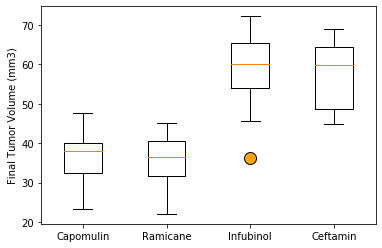

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finalplot=[cap_plot, ram_plot, inf_plot, ceft_plot]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(finalplot, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops={
                                'marker':'o',
                                'markersize': 12,
                                'markeredgecolor': 'black',
                                'markerfacecolor': 'orange' })


plt.show()

## Line and Scatter Plots

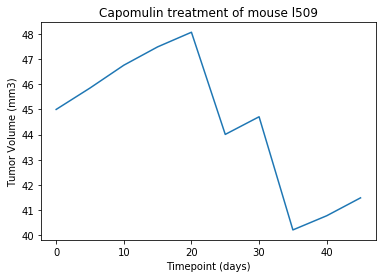

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_mice.loc[clean_mice['Drug Regimen'] == "Capomulin"]
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID']== 'l509']

# Set plot parameters
plt.plot(mouse_df['Timepoint'],mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

plt.show()

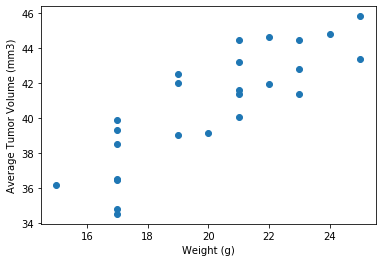

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average = capomulin_df.groupby(['Mouse ID']).mean()

# Set plot parameters
plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot')

plt.show()

## Correlation and Regression

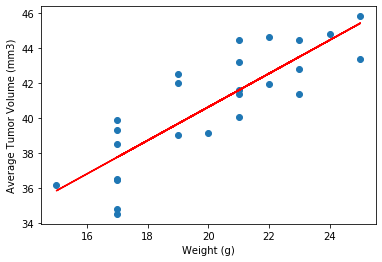

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
average = capomulin_df.groupby(['Mouse ID']).mean()
x_value = average['Weight (g)']
y_value = average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regression = x_value * slope + intercept

# Set plot parameters
plt.scatter(x_value, y_value)
plt.plot(x_value, regression, "red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()